In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import itk
from matplotlib import pyplot as plt
import numpy as np
import pydicom
import sys


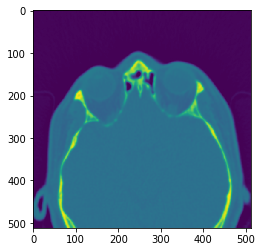

In [33]:
inputFileName = '/mnt/storage/Evidences/LEAL/series1/50.dcm'
outputFileName = '/tmp/batata.png'
sigma = 1.0
Dimension = 2

FloatPixelType = itk.ctype('float')
FloatImageType = itk.Image[FloatPixelType, Dimension]

reader = itk.ImageFileReader[FloatImageType].New()
reader.SetFileName(inputFileName)

reader.Update()
entrada_as_array = itk.GetArrayFromImage(reader.GetOutput())
plt.imshow(entrada_as_array)
plt.show()

In [23]:
gradientMagnitude = \
    itk.GradientMagnitudeImageFilter.New(Input=reader.GetOutput())

watershed = \
    itk.WatershedImageFilter.New(Input=gradientMagnitude.GetOutput())

gradientMagnitude.Update()
saida_gradiente = gradientMagnitude.GetOutput()
image_as_array =  itk.GetArrayFromImage(saida_gradiente)
plt.imshow(image_as_array, interpolation='nearest')
plt.show()

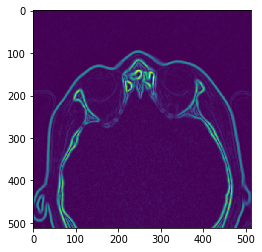

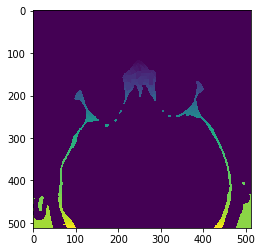

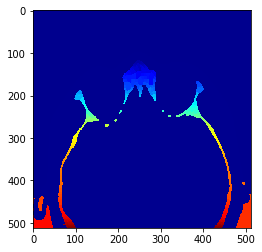

In [41]:
threshold = 0.08
level = 0.05
watershed.SetThreshold(threshold)
watershed.SetLevel(level)

LabeledImageType = type(watershed.GetOutput())

watershed.Update()
just_after_watershed = itk.GetArrayFromImage(watershed.GetOutput())
plt.imshow(just_after_watershed)
plt.show()

PixelType = itk.ctype('unsigned char')
RGBPixelType = itk.RGBPixel[PixelType]
RGBImageType = itk.Image[RGBPixelType, Dimension]

ScalarToRGBColormapFilterType = \
    itk.ScalarToRGBColormapImageFilter[LabeledImageType, RGBImageType]
colormapImageFilter = ScalarToRGBColormapFilterType.New()
colormapImageFilter.SetColormap(ScalarToRGBColormapFilterType.Jet)
colormapImageFilter.SetInput(watershed.GetOutput())
colormapImageFilter.Update()

saida_na_tela = itk.GetArrayFromImage(colormapImageFilter.GetOutput())
#WriterType = itk.ImageFileWriter[RGBImageType]
#writer = WriterType.New()
#writer.SetFileName(outputFileName)
#writer.SetInput(colormapImageFilter.GetOutput())
#writer.Update()
plt.imshow(saida_na_tela)
plt.show()

In [37]:
rgbFilter = itk.RGBToLuminanceImageFilter.New(Input=colormapImageFilter.GetOutput())
rgbFilter.Update()
luminanced_image = rgbFilter.GetOutput()

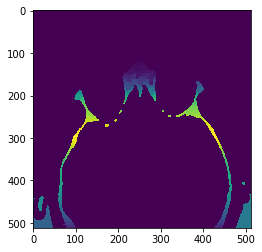

In [40]:
plt.imshow(itk.GetArrayFromImage(luminanced_image))
plt.show()

In [ ]:
second_watershed =  itk.WatershedImageFilter.New(Input=rgbFilter.GetOutput())
